In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})

In [ ]:
import torch as pt

In [ ]:
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [ ]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

# ***Understanding features in the data***



1.   PART_Id: unique ID for each house.
2.   AREA: The area where house is located.
3.   INT_SQFT: Total area of the house in square feet.
4.   DATE_SALE: The date in which the house got sold.
5.   DIST_MAINROAD: How many meters the house is far from main road.
6.   N_BEDROOM: Total Number of Bedrooms.
7.   N_BATHROOM: Total Number of bathrooms.
8.   SALE_COND: Sale condition.
9.   PARK_FACIL: Parking facility.
10.  DATE_BUILD: The date in which the house was built. 
11. BUILDTYPE: What type of building.
12. UTILITY_AVAIL: What are the public facilities are available.
13. STREET: Type of street the house is located.
14. MZZONE: What zone the house belongs to. (There are currently 13 zones in Chennai)
15. QS_ROOMS: Masked rooms.
16. QS_BATHROOM: Masked bathrooms.
17. QS_BEDROOM: Masked bedroom.
18. QS_OVERALL: 
19. REG_FEE: Total registration fee.
20. COMMIS: Total commission payed.
21. SALES_PRICE: Sale price of the house



In [ ]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07




*  The House price in Chennai ranges from 21 lakh to 2 Crore 36 lakh, where, maximum price of house in the dataset is ₹ 23,667,340.00 and minimum price is ₹ 2,156,875.00.
*   The commission price ranges from ₹ 5055 to 5 Lakh.
*   Maximum registration fee is ₹ 983922.00 whereas minimum registration fee ₹ 71177.00.
*   Highest number of room is 6 whereas minimum number of room is 2.
*   Highest number of bedroom is 4 whereas minimum number of bedroom is 1.
*   Highest number of bathroom is 2 whereas minimum number of bathroom is 1.
*   Some houses are completely near to main road whereas some houses are 200 meters away from the main road.
*    The houses in the dataset ranges from 500 to 2500 sq ft.





In [ ]:
df = df.drop(columns ='PRT_ID')

PART_ID, should be removed , which leads to overfitting.

In [ ]:
df['SALES_PRICE'] = df.SALES_PRICE + df.REG_FEE + df.COMMIS

Even though the reg_fee and commision are not useful features, but indirectly affects the sales_price, so we are adding them to sales_price.

In [ ]:
df = df.drop(columns = ['REG_FEE','COMMIS'])
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,8124400
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,22781941
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13672408
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,10063653
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7717313


In [ ]:
df.describe()


,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,1.141285e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,3.944957e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.253935e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,8.645792e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,1.081953e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,1.361393e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,2.496904e+07


# ***1. AREA***

In [ ]:
df["AREA"].isna().sum()

0

In [ ]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [ ]:
df["AREA"] = df["AREA"].replace({'Adyr':'Adyar','Ana Nagar':'Anna Nagar','Ann Nagar':'Anna Nagar','Chormpet':'Chrompet','Chrompt':'Chrompet','Chrmpet':'Chrompet','KKNagar':'KK Nagar','Velchery':'Velachery','TNagar':'T Nagar','Karapakam':'Karapakkam'})

In [ ]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

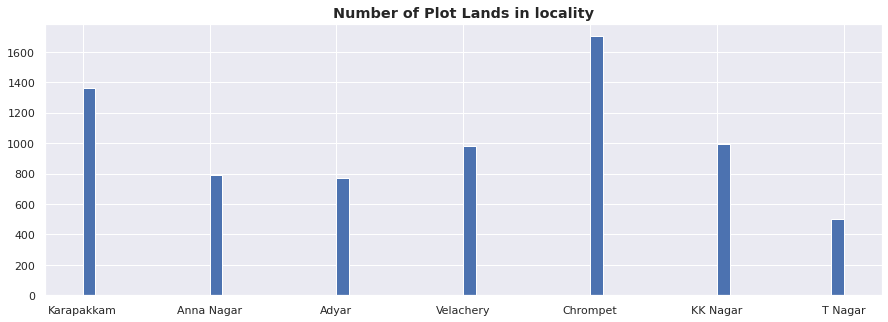

In [ ]:
df.AREA.hist(bins = 60 ,figsize = (15,5))
plot.title("Number of Plot Lands in locality",fontsize='large',fontweight='bold')
plot.xticks(rotation=00)

Most plot lands are from chrompet and least plots are from T Nagar.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Adyar'),
  Text(1, 0, 'Anna Nagar'),
  Text(2, 0, 'Chrompet'),
  Text(3, 0, 'KK Nagar'),
  Text(4, 0, 'Karapakkam'),
  Text(5, 0, 'T Nagar'),
  Text(6, 0, 'Velachery')])

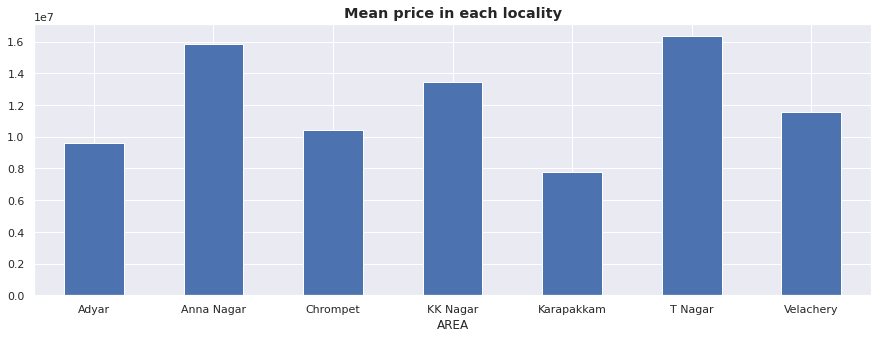

In [ ]:
df.groupby("AREA")["SALES_PRICE"].mean().plot.bar()
plot.title("Mean price in each locality",fontsize='large',fontweight='bold')
plot.xticks(rotation=00)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Karapakkam'),
  Text(1, 0, 'Adyar'),
  Text(2, 0, 'Chrompet'),
  Text(3, 0, 'Velachery'),
  Text(4, 0, 'KK Nagar'),
  Text(5, 0, 'Anna Nagar'),
  Text(6, 0, 'T Nagar')])

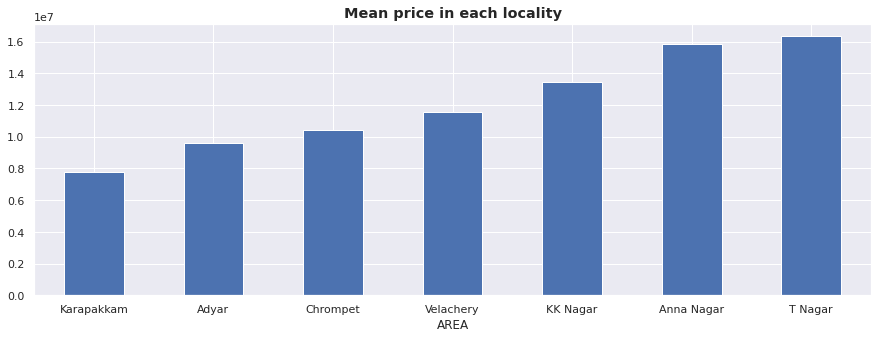

In [ ]:
df.groupby("AREA")["SALES_PRICE"].mean().sort_values().plot.bar()
plot.title("Mean price in each locality",fontsize='large',fontweight='bold')
plot.xticks(rotation=00)

The mean house price in the karapakkam is lowest and T Nagar has the highest mean house price. For this categorical column ,in the linear format. so, one hot encoding is best method.

# ***2. BUILDTYPE***

In [ ]:
df["BUILDTYPE"].isna().sum()

0

In [ ]:
df["BUILDTYPE"].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [ ]:
df["BUILDTYPE"] = df["BUILDTYPE"].replace({'Comercial':'Commercial','Other':'Others'})

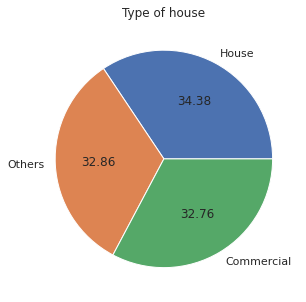

In [ ]:
df.BUILDTYPE.value_counts().plot(kind='pie',autopct='%.2f',figsize = (5,5))
plot.title("Type of house")
plot.ylabel("                             ")
plot.show()

In [ ]:
df[['BUILDTYPE','SALES_PRICE']].groupby('BUILDTYPE').mean().sort_values('SALES_PRICE')

,SALES_PRICE
BUILDTYPE,
House,9.531205e+06
Others,1.027346e+07
Commercial,1.453023e+07


(array([0, 1, 2]),
 [Text(0, 0, 'House'), Text(1, 0, 'Others'), Text(2, 0, 'Commercial')])

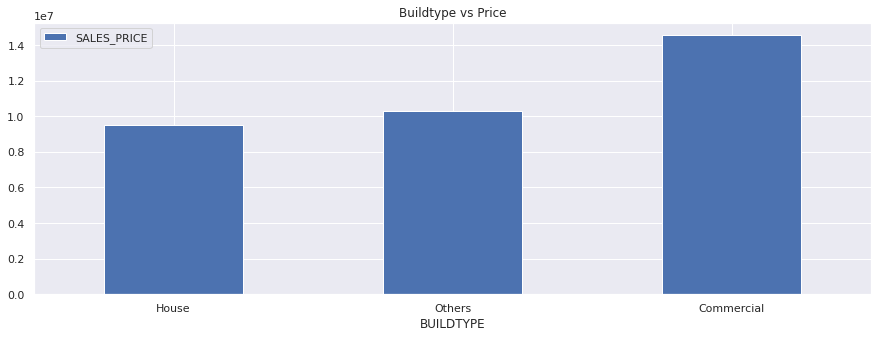

In [ ]:
df[['BUILDTYPE','SALES_PRICE']].groupby('BUILDTYPE').mean().sort_values('SALES_PRICE').plot.bar()
plot.title("Buildtype vs Price")
plot.xticks(rotation=00)

*   The commercial type buildings are pricer than house type buildings.
*   one hot encoding should be used.



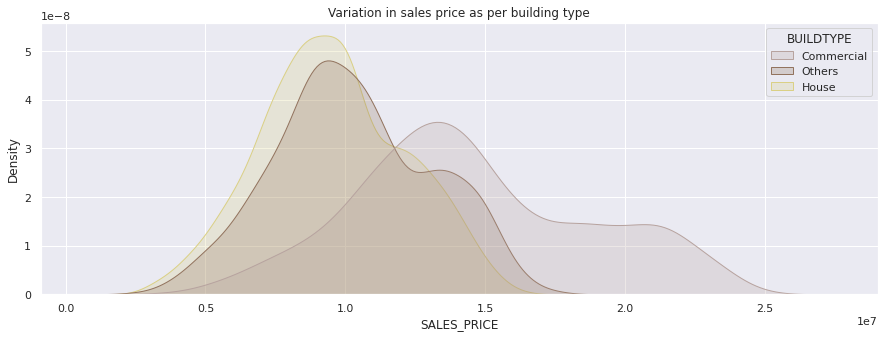

In [ ]:
sns.set_palette('terrain_r')
plot.figure(figsize=(15,5))
sns.kdeplot(data=df, x='SALES_PRICE', hue='BUILDTYPE', shade=True)
plot.title("Variation in sales price as per building type")
plot.show()



*   Commercial house types are pricer than others and house type house, but sold less than them.



# ***3. SALE_COND***

In [ ]:
df["SALE_COND"].isna().sum()

0

In [ ]:
df.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [ ]:
df["SALE_COND"] = df["SALE_COND"].replace({'Ab Normal':'AbNormal','Partiall':'Partial','PartiaLl':'Partial','Adj Land':'AdjLand'})

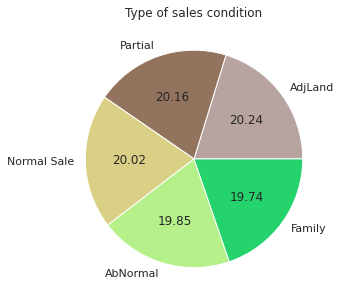

In [ ]:
df.SALE_COND.value_counts().plot(kind='pie',autopct='%.2f',figsize = (5,5))
plot.title("Type of sales condition")
plot.ylabel("                             ")
plot.show()

In [ ]:
df[['SALE_COND','SALES_PRICE']].groupby('SALE_COND').mean().sort_values('SALES_PRICE')

,SALES_PRICE
SALE_COND,
Partial,1.111605e+07
Family,1.125081e+07
AbNormal,1.143618e+07
Normal Sale,1.151787e+07
AdjLand,1.173969e+07


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Partial'),
  Text(1, 0, 'Family'),
  Text(2, 0, 'AbNormal'),
  Text(3, 0, 'Normal Sale'),
  Text(4, 0, 'AdjLand')])

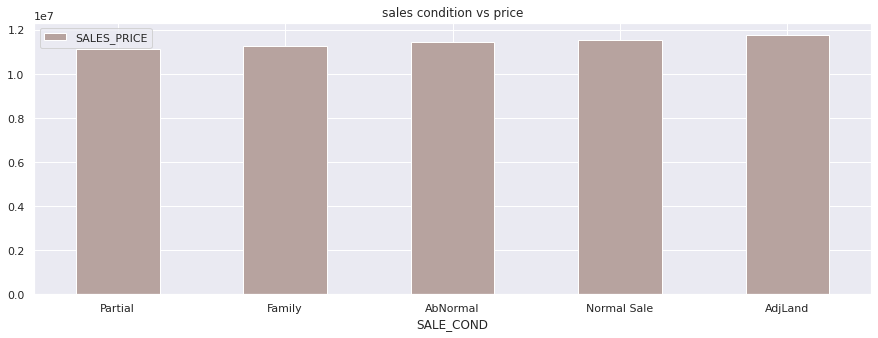

In [ ]:
df[['SALE_COND','SALES_PRICE']].groupby('SALE_COND').mean().sort_values('SALES_PRICE').plot.bar()
plot.title("sales condition vs price")
plot.xticks(rotation=00)



*   Sale condition of house with respect to house price follows a linear trend.
*   Encoding of sale condition column will follow label encoding.



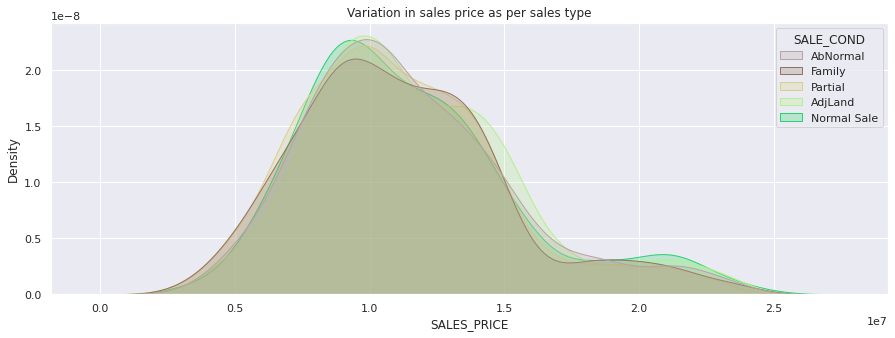

In [ ]:
sns.set_palette('terrain_r')
plot.figure(figsize=(15,5))
sns.kdeplot(data=df, x='SALES_PRICE', hue='SALE_COND', shade=True)
plot.title("Variation in sales price as per sales type")
plot.show()



*   all the sale_conditions are similar.



# ***4. PARK_FACIL***

In [ ]:
df["PARK_FACIL"].isna().sum()

0

In [ ]:
df["PARK_FACIL"].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [ ]:
df["PARK_FACIL"] = df["PARK_FACIL"].replace({'Noo':'No'})

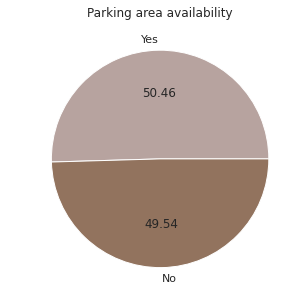

In [ ]:
df.PARK_FACIL.value_counts().plot(kind='pie',autopct='%.2f',figsize = (5,5))
plot.title("Parking area availability")
plot.ylabel("                             ")
plot.show()



*   The availability of parking area is approximately half-half.



In [ ]:
df[['PARK_FACIL','SALES_PRICE']].groupby('PARK_FACIL').mean().sort_values('SALES_PRICE')

,SALES_PRICE
PARK_FACIL,
No,1.082803e+07
Yes,1.198708e+07


(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

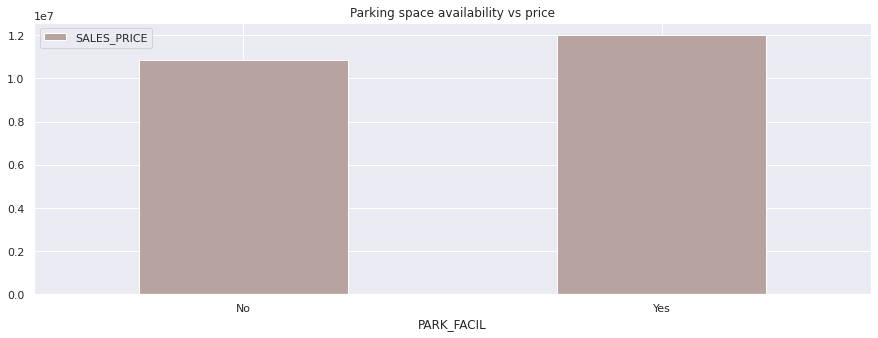

In [ ]:
df[['PARK_FACIL','SALES_PRICE']].groupby('PARK_FACIL').mean().sort_values('SALES_PRICE').plot.bar()
plot.title("Parking space availability vs price")
plot.xticks(rotation=00)



*   The mean house price with parking space is higher than house without parking space.



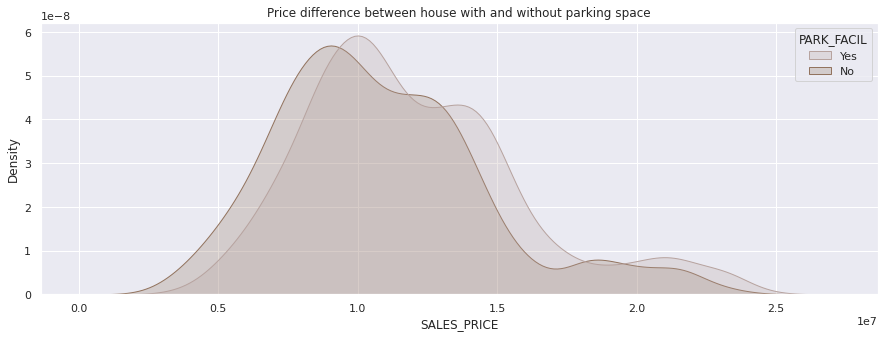

In [ ]:
sns.set_palette('terrain_r')
plot.figure(figsize=(15,5))
sns.kdeplot(data=df, x='SALES_PRICE', hue='PARK_FACIL', shade=True)
plot.title("Price difference between house with and without parking space")
plot.show()

# ***5. STREET***

In [ ]:
sns.set_palette('terrain_r')

In [ ]:
df["STREET"].isna().sum()

0

In [ ]:
df["STREET"].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [ ]:
df["STREET"] = df["STREET"].replace({'Pavd':'Paved','NoAccess':'No Access'})

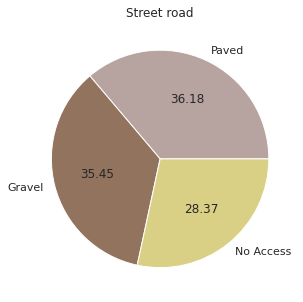

In [ ]:
df.STREET.value_counts().plot(kind='pie',autopct='%.2f',figsize = (5,5))
plot.title("Street road")
plot.ylabel("                             ")
plot.show()



*   Gravel road and Paved road are having similar houses.
*   No access houses are significant.



In [ ]:
df[['STREET','SALES_PRICE']].groupby('STREET').mean().sort_values('SALES_PRICE')

,SALES_PRICE
STREET,
No Access,1.045657e+07
Paved,1.159247e+07
Gravel,1.199494e+07


(array([0, 1, 2]),
 [Text(0, 0, 'No Access'), Text(1, 0, 'Paved'), Text(2, 0, 'Gravel')])

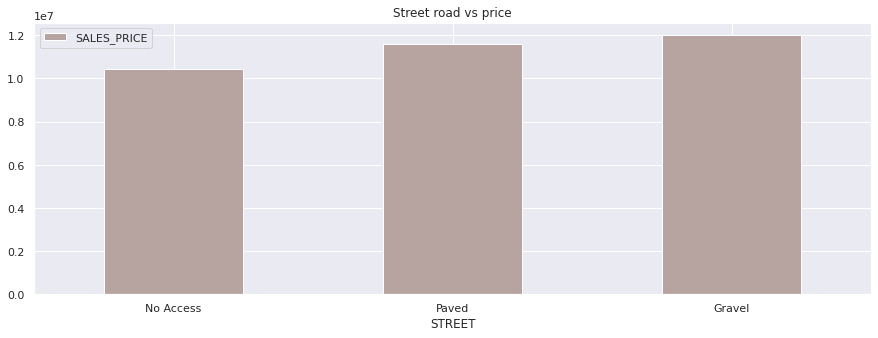

In [ ]:
df[['STREET','SALES_PRICE']].groupby('STREET').mean().sort_values('SALES_PRICE').plot.bar()
plot.title("Street road vs price")
plot.xticks(rotation=00)

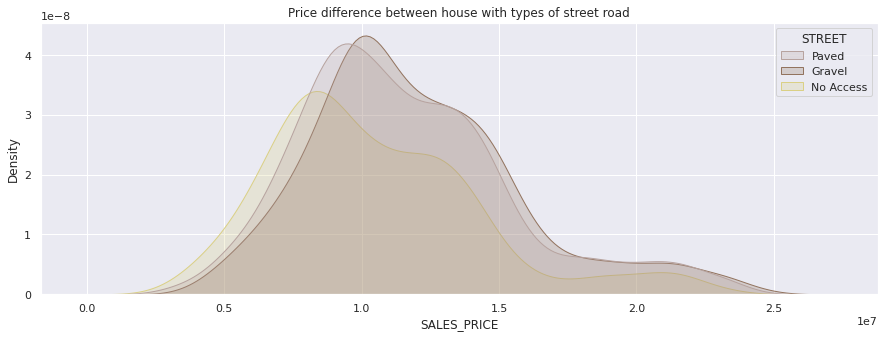

In [ ]:
sns.set_palette('terrain_r')
plot.figure(figsize=(15,5))
sns.kdeplot(data=df, x='SALES_PRICE', hue='STREET', shade=True)
plot.title("Price difference between house with types of street road")
plot.show()

# ***6.	UTILITY_AVAIL***

In [ ]:
df["UTILITY_AVAIL"].isna().sum()

0

In [ ]:
df["UTILITY_AVAIL"].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [ ]:
df["UTILITY_AVAIL"] = df["UTILITY_AVAIL"].replace({'All Pub':'AllPub'})

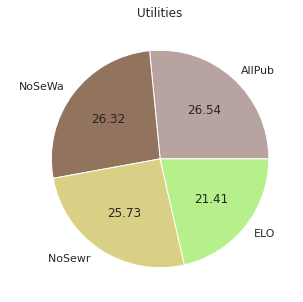

In [ ]:
df.UTILITY_AVAIL.value_counts().plot(kind='pie',autopct='%.2f',figsize = (5,5))
plot.title("Utilities")
plot.ylabel("                             ")
plot.show()

In [ ]:
df[['UTILITY_AVAIL','SALES_PRICE']].groupby('UTILITY_AVAIL').mean().sort_values('SALES_PRICE')

,SALES_PRICE
UTILITY_AVAIL,
ELO,1.094887e+07
NoSeWa,1.141877e+07
NoSewr,1.144859e+07
AllPub,1.174658e+07


(array([0, 1, 2, 3]),
 [Text(0, 0, 'ELO'),
  Text(1, 0, 'NoSeWa'),
  Text(2, 0, 'NoSewr '),
  Text(3, 0, 'AllPub')])

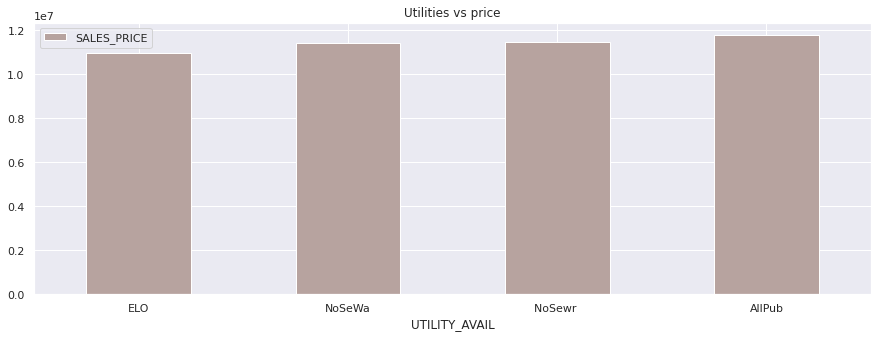

In [ ]:
df[['UTILITY_AVAIL','SALES_PRICE']].groupby('UTILITY_AVAIL').mean().sort_values('SALES_PRICE').plot.bar()
plot.title("Utilities vs price")
plot.xticks(rotation=00)



*   The utilities are in linear form.



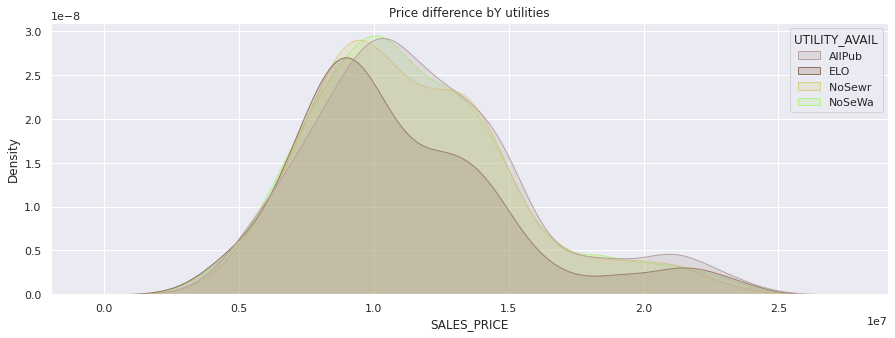

In [ ]:
sns.set_palette('terrain_r')
plot.figure(figsize=(15,5))
sns.kdeplot(data=df, x='SALES_PRICE', hue='UTILITY_AVAIL', shade=True)
plot.title("Price difference bY utilities")
plot.show()

# ***7. MZZONE***

In [ ]:
df["MZZONE"].isna().sum()

0

In [ ]:
df["MZZONE"].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

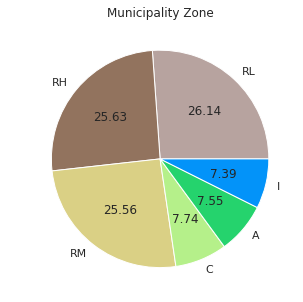

In [ ]:
df.MZZONE.value_counts().plot(kind='pie',autopct='%.2f',figsize = (5,5))
plot.title("Municipality Zone")
plot.ylabel("                             ")
plot.show()



*  There are houses from 6 municipality zone are present in the dataset.
*  Most number of houses are from RL, RH and RM zone.



In [ ]:
df[['MZZONE','SALES_PRICE']].groupby('MZZONE').mean().sort_values('SALES_PRICE')

,SALES_PRICE
MZZONE,
A,7.660002e+06
C,8.457634e+06
I,9.170939e+06
RH,1.156145e+07
RL,1.231839e+07
RM,1.298932e+07


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'A'),
  Text(1, 0, 'C'),
  Text(2, 0, 'I'),
  Text(3, 0, 'RH'),
  Text(4, 0, 'RL'),
  Text(5, 0, 'RM')])

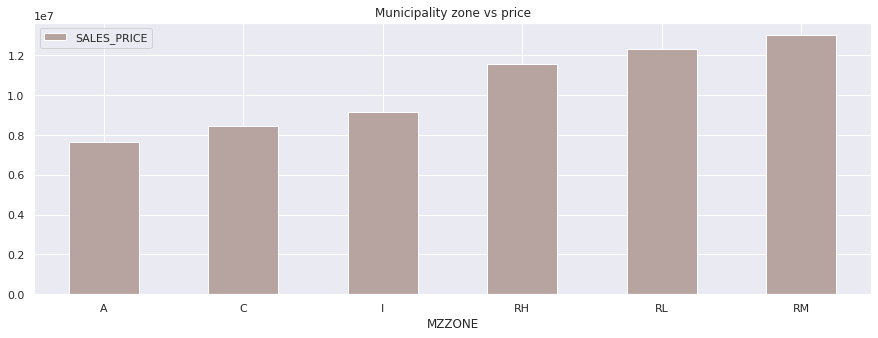

In [ ]:
df[['MZZONE','SALES_PRICE']].groupby('MZZONE').mean().sort_values('SALES_PRICE').plot.bar()
plot.title("Municipality zone vs price")
plot.xticks(rotation=00)



*   Municipality zone is in linear form.
*   House price increases with the municipality zone.
*   RM zone has most expensive houses, whereas A zone has cheapest houses.


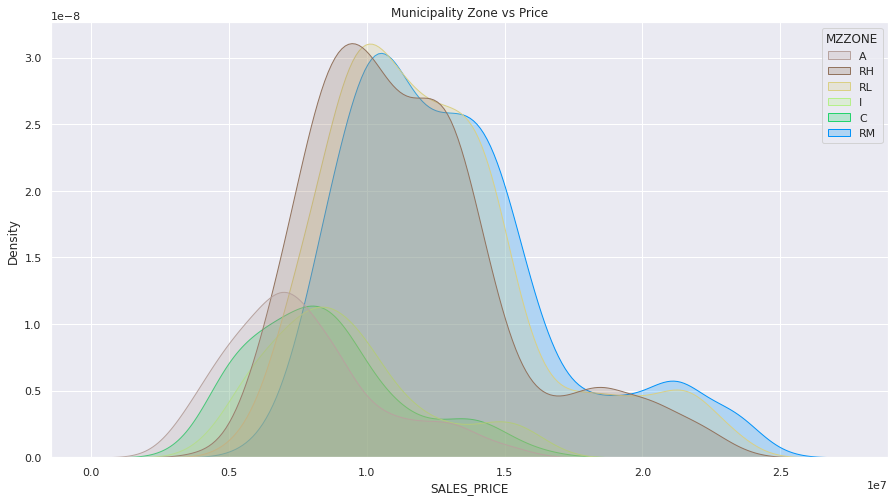

In [ ]:
sns.set_palette('terrain_r')
plot.figure(figsize=(15,8))
sns.kdeplot(data=df, x='SALES_PRICE', hue='MZZONE', shade=True)
plot.title("Municipality Zone vs Price")
plot.show()



*   A,C,I are lowest price in municipality zones.



# ***8. INT_SQFT***

In [ ]:
df["INT_SQFT"].values

array([1004, 1986,  909, ..., 1614,  787, 1896])

In [ ]:
df["INT_SQFT"].isna().sum()

0

In [ ]:
q3 = df.INT_SQFT.quantile(0.75)
q1 = df.INT_SQFT.quantile(0.25)
iqr = q3 - q1
iqr

751.0

In [ ]:
q3 + 1.5*iqr

2870.5

In [ ]:
q1 - 1.5*iqr

-133.5

***There are no outliers in this column.***

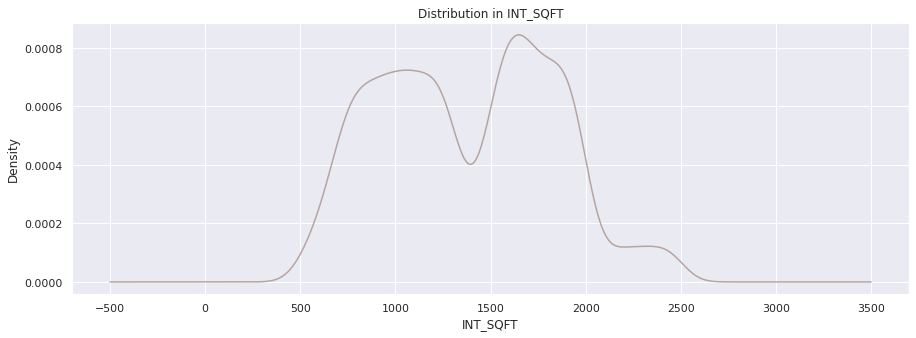

In [ ]:
df.INT_SQFT.plot.kde()
plot.title("Distribution in INT_SQFT")
plot.xlabel('INT_SQFT')
plot.show()



*   Non linearly distributed data like the INT_SQFT that doesn't follow a normal distribution need to be transformed.



In [ ]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,8124400
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,22781941
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13672408
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,10063653
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7717313


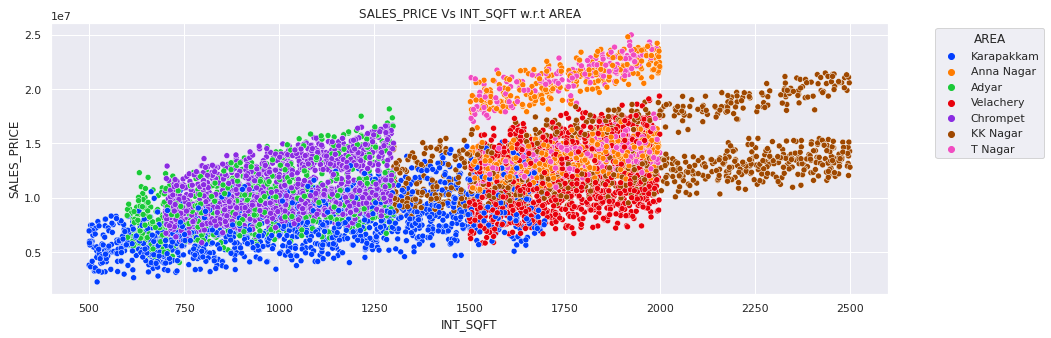

In [ ]:
plot.figure(figsize=(15,5))
sns.scatterplot(data=df, x='INT_SQFT', y='SALES_PRICE', hue='AREA', palette='bright')
plot.title("SALES_PRICE Vs INT_SQFT w.r.t AREA")
plot.legend(title='AREA',bbox_to_anchor=(1.05, 1))
plot.show()



*  INT_SQFT follows linear relationship with SALES_PRICE in individual level as well as in cumulative level.
*   KK Nagar houses are comparatively bigger in size than houses in other areas.
*   Karapakkam, Adyar has lower size houses.



# ***9. DATE_SALE and DATE_BUILD (AGE and BUILT_YEAR)***

Both the date_sale and date_build are in string format. We have to change in datetimeindex and converted into age of building.

In [ ]:
df['AGE'] = pd.DatetimeIndex(df['DATE_SALE']).year - pd.DatetimeIndex(df['DATE_BUILD']).year

In [ ]:
df['BUILT_YEAR'] = pd.DatetimeIndex(df['DATE_BUILD']).year

No need for date_sale and date_build.

In [ ]:
df['SALE_YEAR'] = pd.DatetimeIndex(df['DATE_SALE']).year

In [ ]:
df = df.drop(columns = ['DATE_SALE','DATE_BUILD'])

In [ ]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE,BUILT_YEAR,SALE_YEAR
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,8124400,44,1967,2011
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,22781941,11,1995,2006
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13672408,20,1992,2012
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,10063653,22,1988,2010
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7717313,30,1979,2009


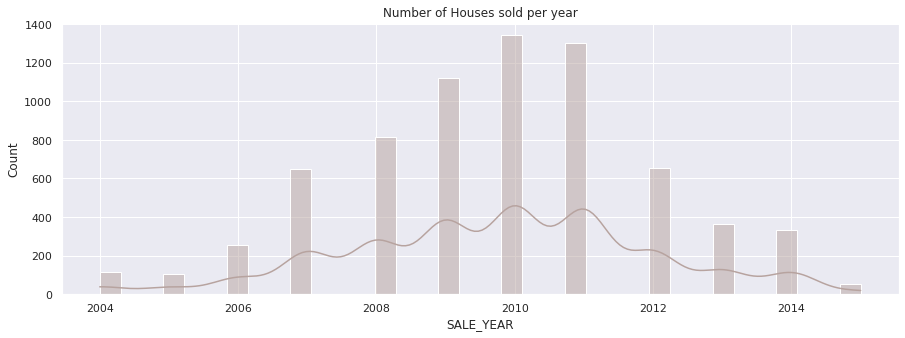

In [ ]:
sns.histplot(data=df, x='SALE_YEAR', palette='terrain_r',kde = True)
plot.title("Number of Houses sold per year")
plot.show()

All the houses are sold in between 2005 and 2015.

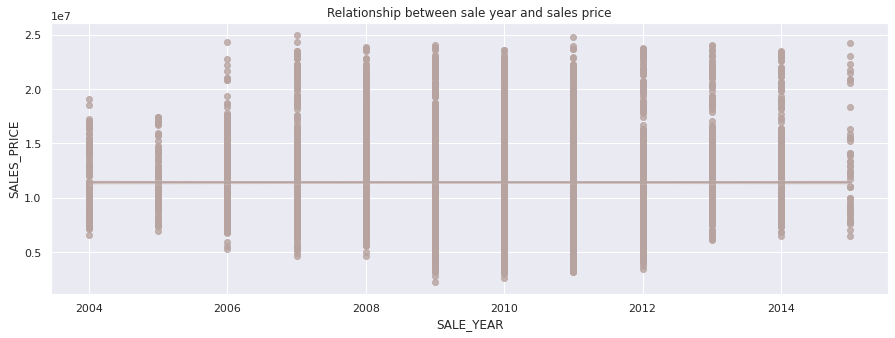

In [ ]:
plot.figure(figsize=(15,5))
sns.regplot(data=df, x='SALE_YEAR', y='SALES_PRICE')
plot.title("Relationship between sale year and sales price")
plot.show()

As the sell year versus sales price are in uniform form, it is useless feature.

In [ ]:
df = df.drop(columns ='SALE_YEAR')

In [ ]:
df.BUILT_YEAR.describe()

count    7109.000000
mean     1985.491912
std        12.648859
min      1949.000000
25%      1976.000000
50%      1986.000000
75%      1996.000000
max      2010.000000
Name: BUILT_YEAR, dtype: float64

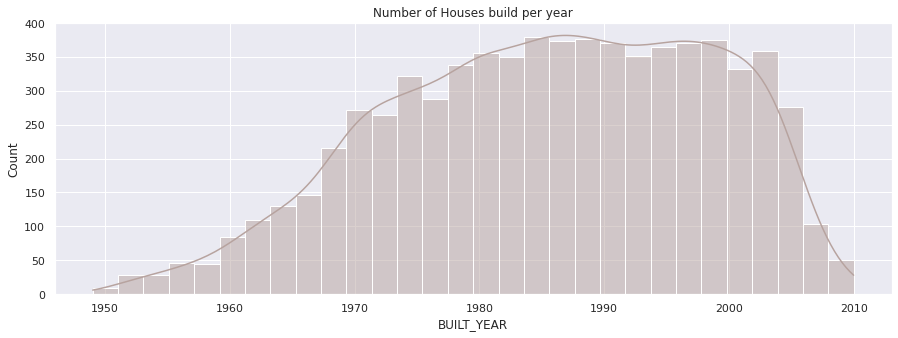

In [ ]:
sns.histplot(data=df,x = 'BUILT_YEAR', palette='terrain_r',kde = True)
plot.title("Number of Houses build per year")
plot.show()


*   All the houses are built in between 1949 and 2010.
*   The distribution in number of houses built per year is right skewed.



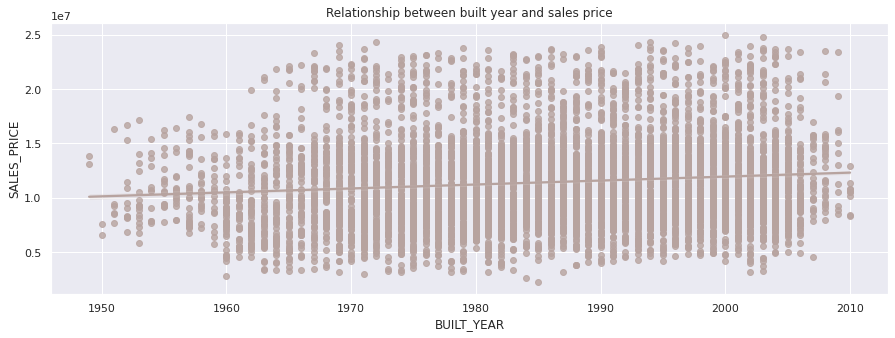

In [ ]:
plot.figure(figsize=(15,5))
sns.regplot(data=df, x='BUILT_YEAR', y='SALES_PRICE')
plot.title("Relationship between built year and sales price")
plot.show()

As the built year versus sales price are in linear form

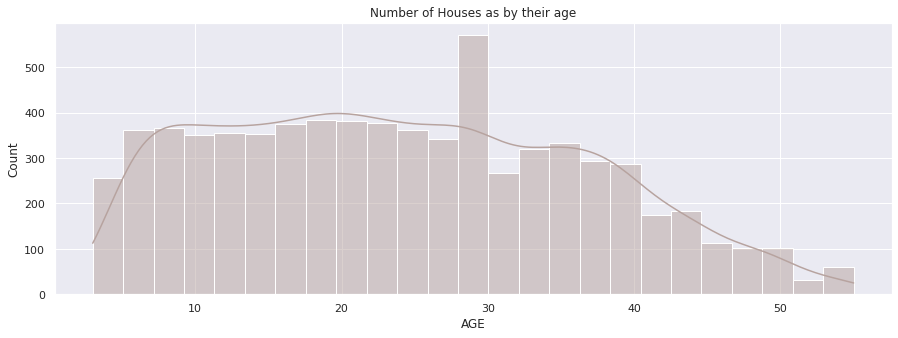

In [ ]:
sns.histplot(data=df,x = 'AGE', palette='terrain_r',kde = True)
plot.title("Number of Houses as by their age")
plot.show()


*   The minimum age of a house is 3 years and maximum age of house is 55 year.





*   What is best way to represent age of house with respect to sales_price?
*   Build_type because it is not effected with age of house.



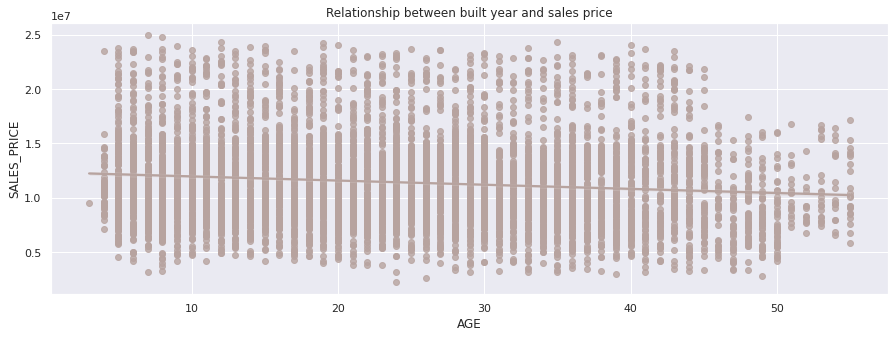

In [ ]:
plot.figure(figsize=(15,5))
sns.regplot(data=df, x='AGE', y='SALES_PRICE')
plot.title("Relationship between built year and sales price")
plot.show()

<Figure size 1080x360 with 0 Axes>

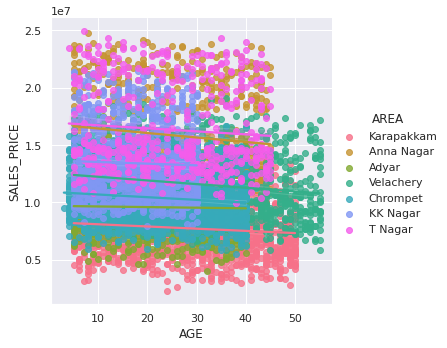

In [ ]:
plot.figure(figsize=(15,5))
ax = sns.lmplot(data=df, x='AGE', y='SALES_PRICE', hue='AREA') 



*   As the age increases, the sales_price decreases.



In [ ]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE,BUILT_YEAR
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,8124400,44,1967
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,22781941,11,1995
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13672408,20,1992
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,10063653,22,1988
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7717313,30,1979


# ***10. QS_ROOMS, QS_BATHROOM, QS_BEDROOM and QS_OVERALL***

In [ ]:
df["QS_ROOMS"].isna().sum()

0

In [ ]:
df["QS_BATHROOM"].isna().sum()

0

In [ ]:
df["QS_BEDROOM"].isna().sum()

0

In [ ]:
df["QS_OVERALL"].isna().sum()

48

QS_overall has 48 vacanices.

In [ ]:
df.QS_OVERALL.mean()

3.5032537884152384

In [ ]:
df.QS_OVERALL.mode()

0    3.54
dtype: float64

In [ ]:
df.QS_OVERALL.median()

3.5

As the mean,mode and median are near to 3.5, I am replacing the missing data with 3.5.

In [ ]:
df['QS_OVERALL'] = df['QS_OVERALL'].replace(np.nan, df.QS_OVERALL.mean().round(3))

In [ ]:
df["QS_OVERALL"].isna().sum()  #check


0

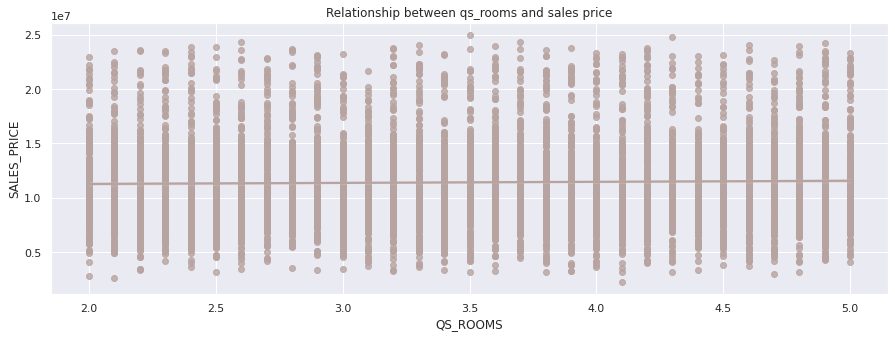

In [ ]:
plot.figure(figsize=(15,5))
sns.regplot(data=df, x='QS_ROOMS', y='SALES_PRICE')
plot.title("Relationship between qs_rooms and sales price")
plot.show()

QS rooms follows uniform discrete distribution with sales price.

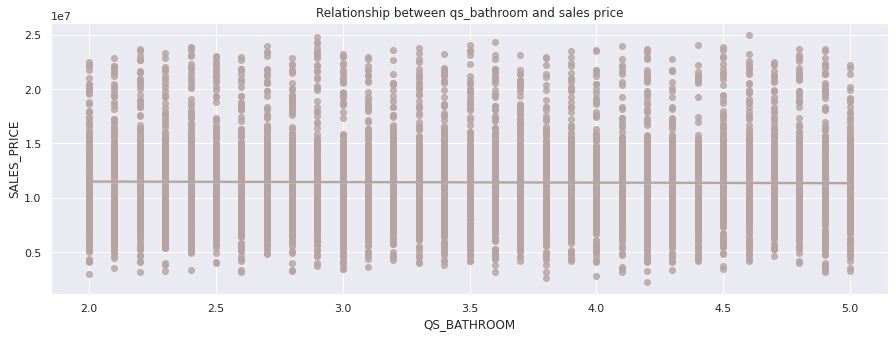

In [ ]:
plot.figure(figsize=(15,5))
sns.regplot(data=df, x='QS_BATHROOM', y='SALES_PRICE')
plot.title("Relationship between qs_bathroom and sales price")
plot.show()

QS bathroom follows uniform discrete distribution with sales price.

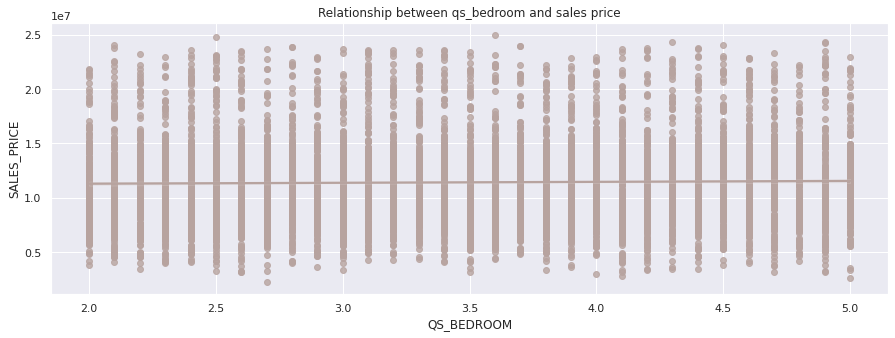

In [ ]:
plot.figure(figsize=(15,5))
sns.regplot(data=df, x='QS_BEDROOM', y='SALES_PRICE')
plot.title("Relationship between qs_bedroom and sales price")
plot.show()

QS bedroom follows uniform discrete distribution with sales price.

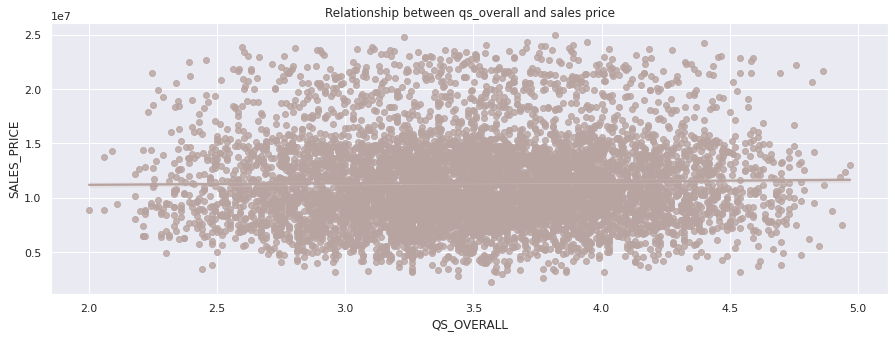

In [ ]:
plot.figure(figsize=(15,5))
sns.regplot(data=df, x='QS_OVERALL', y='SALES_PRICE')
plot.title("Relationship between qs_overall and sales price")
plot.show()

QS overalll follows uniform discrete distribution with sales price.

*   QS overalll follows uniform discrete distribution with sales price.
*   QS_ROOMS, QS_BATHROOM, QS_BEDROOM and QS_OVERALL are all uniform with respect to sales_price , thus are useless feature. so, we drop them.



In [ ]:
df = df.drop(columns = [ 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM' ,'QS_OVERALL'])

In [ ]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,BUILT_YEAR
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,8124400,44,1967
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,22781941,11,1995
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,13672408,20,1992
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,10063653,22,1988
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,7717313,30,1979


# ***11. DIST_MAINROAD***

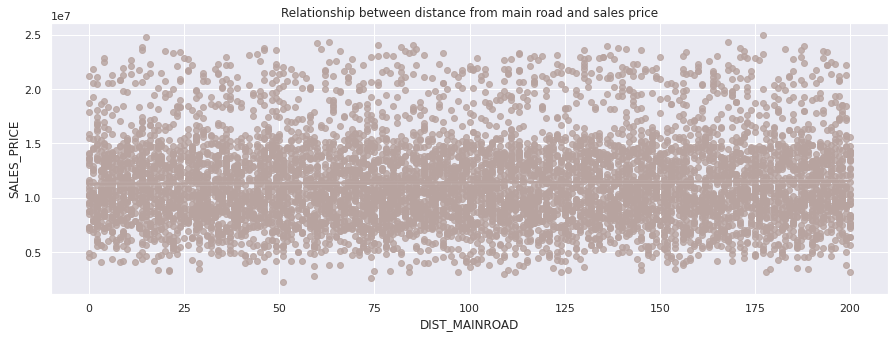

In [ ]:
plot.figure(figsize=(15,5))
sns.regplot(data=df, x='DIST_MAINROAD', y='SALES_PRICE')
plot.title("Relationship between distance from main road and sales price")
plot.show()

In general, the furthur house from main road, the price decreases.

*   But , the distance from main road is uniform with respect to sales price, which makes it useless feature.


In [ ]:
df = df.drop(columns = 'DIST_MAINROAD')

In [ ]:
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,BUILT_YEAR
0,Karapakkam,1004,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,8124400,44,1967
1,Anna Nagar,1986,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,22781941,11,1995
2,Adyar,909,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,13672408,20,1992
3,Velachery,1855,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,10063653,22,1988
4,Karapakkam,1226,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,7717313,30,1979


# ***12. N_BEDROOM, N_BATHROOM and N_ROOM***



*   Given the N_BEDROOM and N_BATHROOM are in float64, but 1.5 room doesn't makes sense . It should be in int.



In [ ]:
df['N_BEDROOM'].isna().sum()

1

In [ ]:
df.N_BEDROOM.mean()

1.6370287000562747

In [ ]:
df.N_BEDROOM.mode()

0    1.0
dtype: float64

In [ ]:
df.N_BEDROOM.median()

1.0

In [ ]:
df['N_BEDROOM'] = df['N_BEDROOM'].replace(np.nan, df.N_BEDROOM.mode().values[0])

We are filling the missing data in N_BEDROOM with mode.

In [ ]:
df['N_BATHROOM'].isna().sum()

5

In [ ]:
df.N_BATHROOM.mean()

1.213260135135135

In [ ]:
df.N_BATHROOM.mode()

0    1.0
dtype: float64

In [ ]:
df.N_BATHROOM.median()

1.0

We are filling the missing data in N_BATHROOM with mode.

In [ ]:
df['N_BATHROOM'] = df['N_BATHROOM'].replace(np.nan, df.N_BATHROOM.mode().values[0])

In [ ]:
df['N_BEDROOM'] = df.N_BEDROOM.apply(int)
df['N_BATHROOM'] = df.N_BATHROOM.apply(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   AREA           7109 non-null   object
 1   INT_SQFT       7109 non-null   int64 
 2   N_BEDROOM      7109 non-null   int64 
 3   N_BATHROOM     7109 non-null   int64 
 4   N_ROOM         7109 non-null   int64 
 5   SALE_COND      7109 non-null   object
 6   PARK_FACIL     7109 non-null   object
 7   BUILDTYPE      7109 non-null   object
 8   UTILITY_AVAIL  7109 non-null   object
 9   STREET         7109 non-null   object
 10  MZZONE         7109 non-null   object
 11  SALES_PRICE    7109 non-null   int64 
 12  AGE            7109 non-null   int64 
 13  BUILT_YEAR     7109 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 777.7+ KB


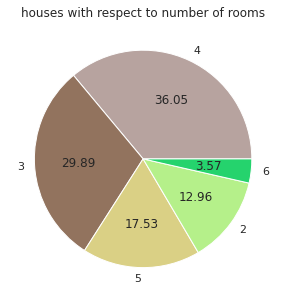

In [ ]:
sns.set_palette('terrain_r')
df.N_ROOM.value_counts().plot(kind='pie', autopct="%.2f")
plot.title("houses with respect to number of rooms")
plot.ylabel('')
plot.show()



*   Most are interested in 4 room house.



In [ ]:
df[['N_ROOM','SALES_PRICE']].groupby('N_ROOM').mean().sort_values('SALES_PRICE')

,SALES_PRICE
N_ROOM,
2,7.311581e+06
3,9.705458e+06
4,1.225463e+07
5,1.483657e+07
6,1.527924e+07


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6')])

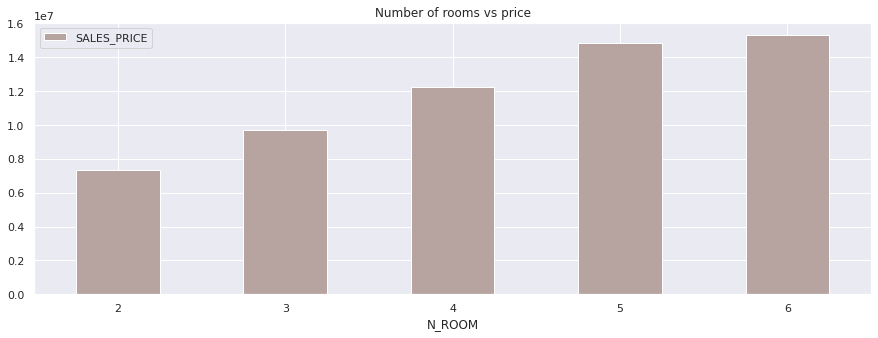

In [ ]:
df[['N_ROOM','SALES_PRICE']].groupby('N_ROOM').mean().sort_values('SALES_PRICE').plot.bar()
plot.title("Number of rooms vs price")
plot.xticks(rotation=00)



*   As expected, with increase in rooms, the price increases.


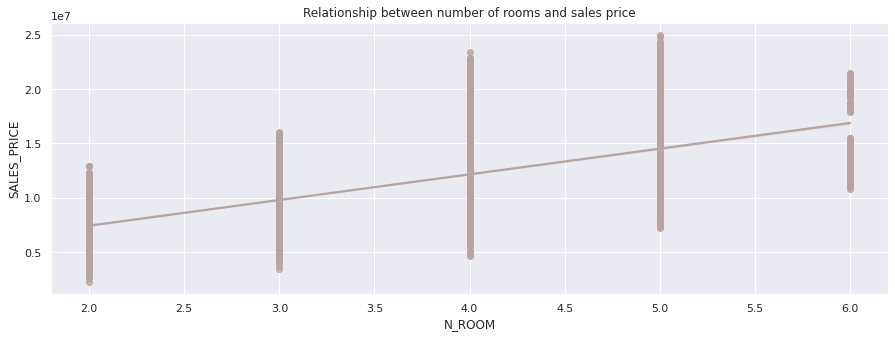

In [ ]:
plot.figure(figsize=(15,5))
sns.regplot(data=df, x='N_ROOM', y='SALES_PRICE')
plot.title("Relationship between number of rooms and sales price")
plot.show()



*  With increase in room number, house price increase.
*  Follows a linear trend.



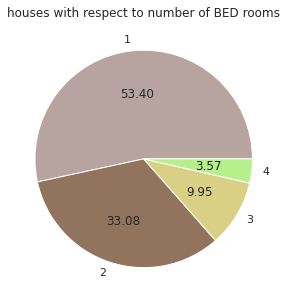

In [ ]:
sns.set_palette('terrain_r')
df.N_BEDROOM.value_counts().plot(kind='pie', autopct="%.2f")
plot.title("houses with respect to number of BED rooms")
plot.ylabel('')
plot.show()



*   Most people are interested in one bedroom.



In [ ]:
df[['N_BEDROOM','SALES_PRICE']].groupby('N_BEDROOM').mean().sort_values('SALES_PRICE')

,SALES_PRICE
N_BEDROOM,
1,1.022734e+07
2,1.239016e+07
3,1.313775e+07
4,1.527924e+07


(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

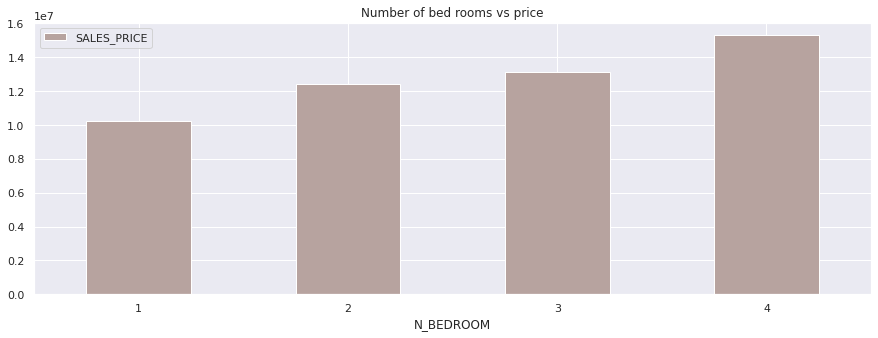

In [ ]:
df[['N_BEDROOM','SALES_PRICE']].groupby('N_BEDROOM').mean().sort_values('SALES_PRICE').plot.bar()
plot.title("Number of bed rooms vs price")
plot.xticks(rotation=00)



*   There is sudden hike in price from one bedrom and two bedroom , three bedroom and four bedrooms.


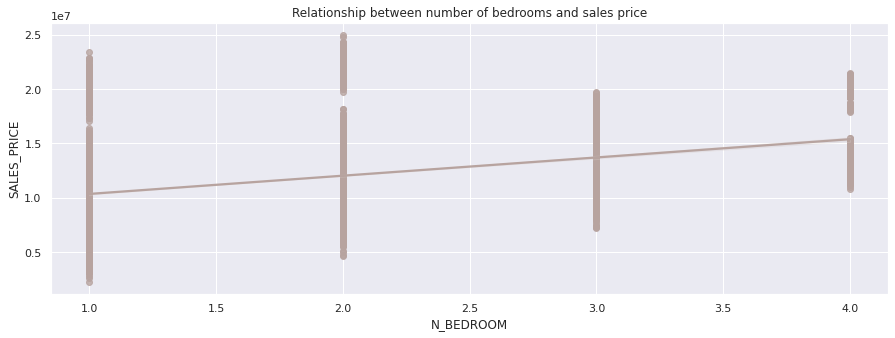

In [ ]:
plot.figure(figsize=(15,5))
sns.regplot(data=df, x='N_BEDROOM', y='SALES_PRICE')
plot.title("Relationship between number of bedrooms and sales price")
plot.show()

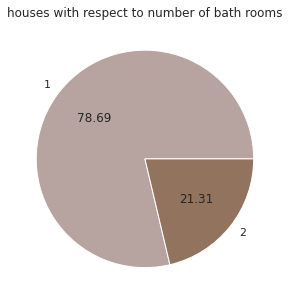

In [ ]:
sns.set_palette('terrain_r')
df.N_BATHROOM.value_counts().plot(kind='pie', autopct="%.2f")
plot.title("houses with respect to number of bath rooms")
plot.ylabel('')
plot.show()

More than 75 percent house has one bedroom , people are prefering the one bathroom.

In [ ]:
df[['N_BATHROOM','SALES_PRICE']].groupby('N_BATHROOM').mean().sort_values('SALES_PRICE')

,SALES_PRICE
N_BATHROOM,
1,1.116952e+07
2,1.231133e+07


(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '2')])

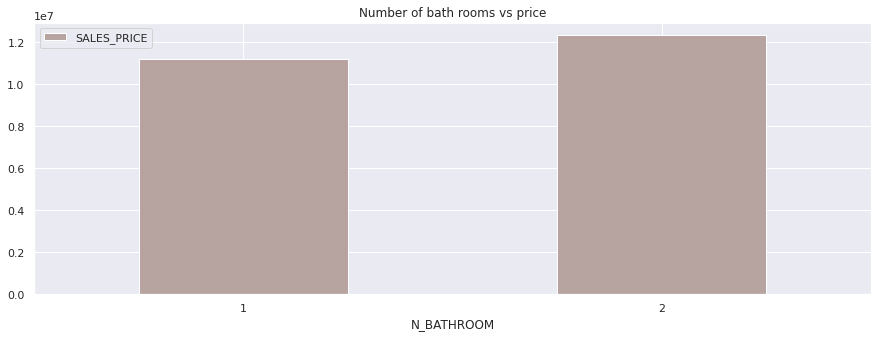

In [ ]:
df[['N_BATHROOM','SALES_PRICE']].groupby('N_BATHROOM').mean().sort_values('SALES_PRICE').plot.bar()
plot.title("Number of bath rooms vs price")
plot.xticks(rotation=00)

As usual , the with increase in bathrooms,price increases.

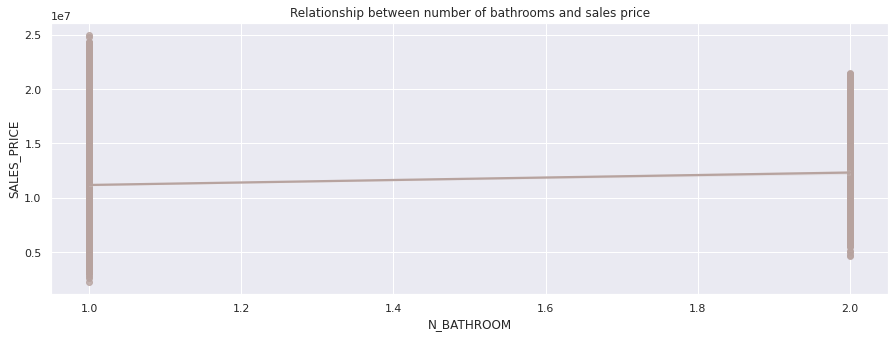

In [ ]:
plot.figure(figsize=(15,5))
sns.regplot(data=df, x='N_BATHROOM', y='SALES_PRICE')
plot.title("Relationship between number of bathrooms and sales price")
plot.show()



*   Follows Linear trend.


In [ ]:
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,BUILT_YEAR
0,Karapakkam,1004,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,8124400,44,1967
1,Anna Nagar,1986,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,22781941,11,1995
2,Adyar,909,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,13672408,20,1992
3,Velachery,1855,3,2,5,Family,No,Others,NoSewr,Paved,I,10063653,22,1988
4,Karapakkam,1226,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,7717313,30,1979


# ***Exploratory Data Analysis***

In [ ]:
df.corr()

,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALES_PRICE,AGE,BUILT_YEAR
INT_SQFT,1.000000,0.786263,0.515290,0.951279,0.620010,-0.012610,-0.009301
N_BEDROOM,0.786263,1.000000,0.755207,0.840209,0.341300,-0.045873,0.012421
N_BATHROOM,0.515290,0.755207,1.000000,0.568541,0.118533,-0.020403,0.001514
N_ROOM,0.951279,0.840209,0.568541,1.000000,0.609345,-0.033316,0.013409
SALES_PRICE,0.620010,0.341300,0.118533,0.609345,1.000000,-0.119536,0.116524
AGE,-0.012610,-0.045873,-0.020403,-0.033316,-0.119536,1.000000,-0.984721
BUILT_YEAR,-0.009301,0.012421,0.001514,0.013409,0.116524,-0.984721,1.000000


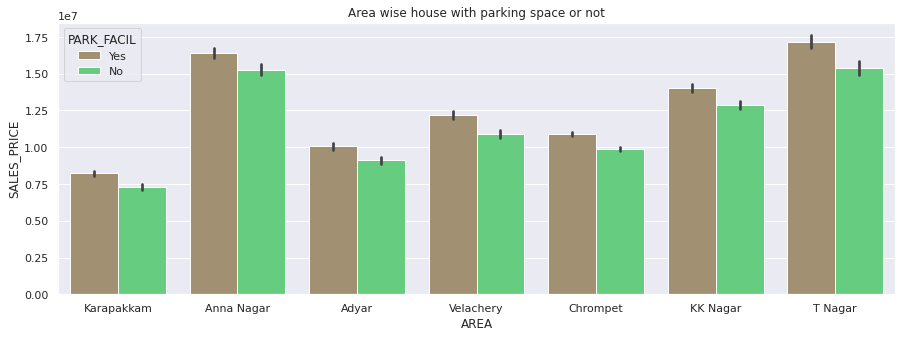

In [ ]:
plot.figure(figsize=(15,5))
sns.barplot(x='AREA',y='SALES_PRICE', data=df, hue='PARK_FACIL', palette='terrain_r')
plot.title("Area wise house with parking space or not")
plot.xticks(rotation=00)
plot.show()

Almost all the house are split between in having parking space or not.

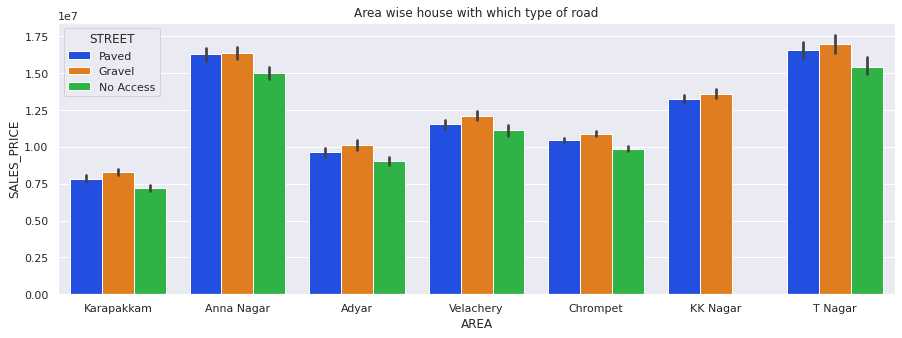

In [ ]:
plot.figure(figsize=(15,5))
sns.barplot(x='AREA',y='SALES_PRICE', data=df, hue='STREET', palette='bright')
plot.title("Area wise house with which type of road")
plot.xticks(rotation=00)
plot.show()



*   All the houses in KK Nagar has access to road.
*   More houses are connected to gravel roads than paved road.



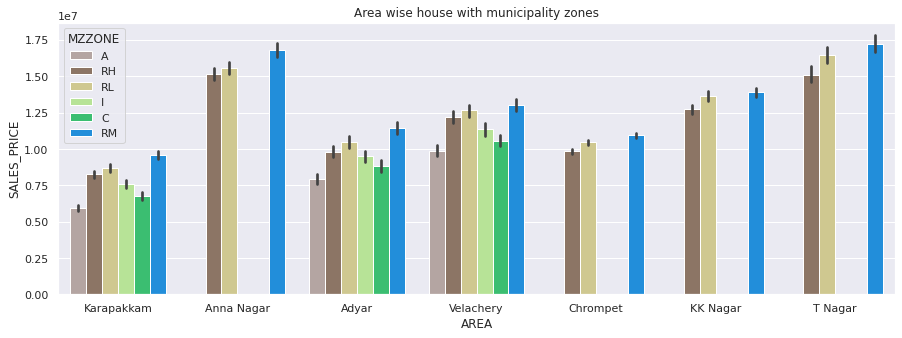

In [ ]:
plot.figure(figsize=(15,5))
sns.barplot(x='AREA',y='SALES_PRICE', data=df, hue='MZZONE', palette='terrain_r')
plot.title("Area wise house with municipality zones")
plot.xticks(rotation=00)
plot.show()



*   Karapakkam, Adyar and Velachery are all areas comes under all municipality zones.
*   some of all areas comes under RM,RL and RH municipality zones.



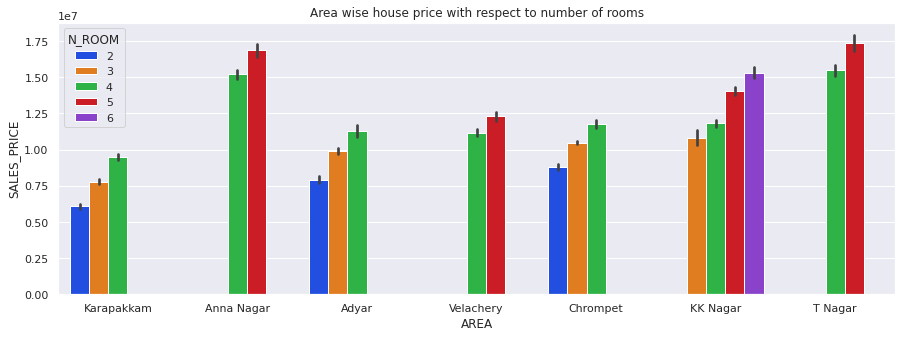

In [ ]:
plot.figure(figsize=(15,5))
sns.barplot(x='AREA',y='SALES_PRICE', data=df, hue='N_ROOM', palette='bright')
plot.title("Area wise house price with respect to number of rooms")
plot.xticks(rotation=00)
plot.show()



*   All the house in Anna Nagar ,Velachery and T Nagar have 5 or 6 rooms.
*   Minimum number of rooms in house are 2 and maximum number of rooms in house are 6.



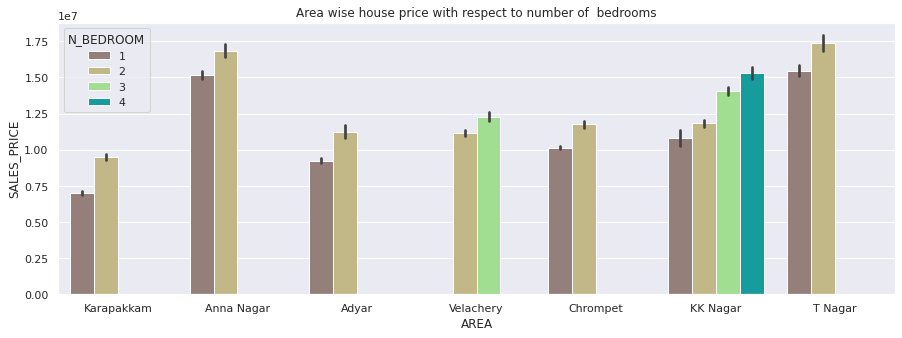

In [ ]:
plot.figure(figsize=(15,5))
sns.barplot(x='AREA',y='SALES_PRICE', data=df, hue='N_BEDROOM', palette='terrain_r')
plot.title("Area wise house price with respect to number of  bedrooms")
plot.xticks(rotation=00)
plot.show()



*   KK Nagar only has range of bedrooms from 1 to 4.
*   Velachery has either two or three bedrooms.
*   Remaining all other areas has one or two bedrooms.



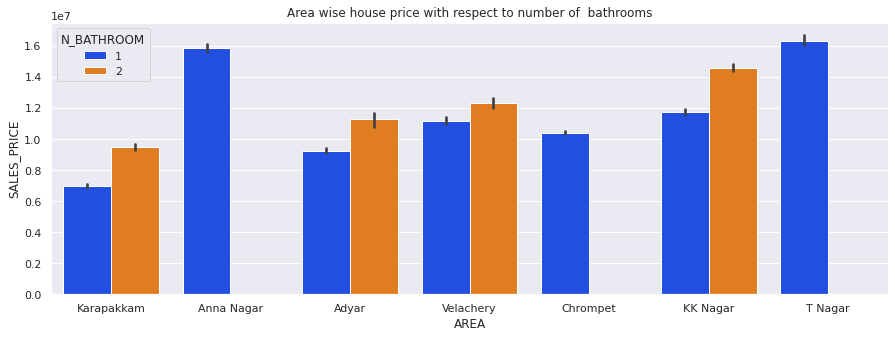

In [ ]:
plot.figure(figsize=(15,5))
sns.barplot(x='AREA',y='SALES_PRICE', data=df, hue='N_BATHROOM', palette='bright')
plot.title("Area wise house price with respect to number of  bathrooms")
plot.xticks(rotation=00)
plot.show()



*   All the house in Anna Nagar and Chrompet have only one bathroom.
*   Remaining all other areas have both one or two bathrooms.



# ***Encoding***

In [ ]:
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,BUILT_YEAR
0,Karapakkam,1004,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,8124400,44,1967
1,Anna Nagar,1986,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,22781941,11,1995
2,Adyar,909,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,13672408,20,1992
3,Velachery,1855,3,2,5,Family,No,Others,NoSewr,Paved,I,10063653,22,1988
4,Karapakkam,1226,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,7717313,30,1979


In [ ]:
df['AREA'] = df.AREA.map({'Karapakkam': 0, 'Adyar': 1, 'Chrompet': 2, 'Velachery': 3, 'KK Nagar': 4, 'Anna Nagar': 5, 'T Nagar': 6})
df['SALE_COND'] = df.SALE_COND.map({'Partial': 0, 'Family': 1,'AbNormal': 2, 'Normal Sale': 3, 'AdjLand': 4})
df['PARK_FACIL'] = df.PARK_FACIL.map({"No":0,'Yes':1,})
df['UTILITY_AVAIL'] = df.UTILITY_AVAIL.map({'ELO': 0, 'NoSeWa': 1, 'NoSewr ': 2,'AllPub': 3})
df['STREET'] = df.STREET.map({'No Access': 0,'Paved': 1, 'Gravel': 2})
df['MZZONE'] = df.MZZONE.map({'A': 0, 'C': 1, 'I': 2, 'RH': 3, 'RL': 4, 'RM': 5})
# df["BUILDTYPE"] = df.BUILDTYPE.map({"House":0,"Commercial":1,"Others":2})

In [ ]:
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,BUILT_YEAR
0,0,1004,1,1,3,2,1,Commercial,3,1,0,8124400,44,1967
1,5,1986,2,1,5,2,0,Commercial,3,2,3,22781941,11,1995
2,1,909,1,1,3,2,1,Commercial,0,2,4,13672408,20,1992
3,3,1855,3,2,5,1,0,Others,2,1,2,10063653,22,1988
4,0,1226,1,1,3,2,1,Others,3,2,1,7717313,30,1979


In [ ]:
df = pd.get_dummies(df)

In [ ]:
# normalization in INT_SQFT
df['INT_SQFT'] = np.log(df.INT_SQFT)

In [ ]:
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,BUILT_YEAR,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,0,6.911747,1,1,3,2,1,3,1,0,8124400,44,1967,1,0,0
1,5,7.593878,2,1,5,2,0,3,2,3,22781941,11,1995,1,0,0
2,1,6.812345,1,1,3,2,1,0,2,4,13672408,20,1992,1,0,0
3,3,7.525640,3,2,5,1,0,2,1,2,10063653,22,1988,0,0,1
4,0,7.111512,1,1,3,2,1,3,2,1,7717313,30,1979,0,0,1


# ***Modelling***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
y = df.SALES_PRICE
X = df.drop(["SALES_PRICE"],axis = 1)
X.shape, y.shape

((7109, 15), (7109,))

Feature Scaling

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 100,test_size=0.4)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4265, 15), (4265,), (2844, 15), (2844,))

In [ ]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ***Linear Regression***

In [ ]:
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [ ]:
lr_score = metrics.r2_score(y_test, y_pred)
lr_mae = metrics.mean_absolute_error(y_test, y_pred)
print("Linear Regression Training score: {:.2f}".format(lr.score(X_train, y_train)))
print("Linear Regression Test score: {:.2f}".format(lr.score(X_test, y_test)))
print("R2 score: {:.2f}".format(metrics.r2_score(y_test, y_pred)))
print("MSE: {:.2f}".format(metrics.mean_squared_error(y_test, y_pred)))
print("MAE: {:.2f}".format(metrics.mean_absolute_error(y_test, y_pred)))

Linear Regression Training score: 0.92
Linear Regression Test score: 0.92
R2 score: 0.92
MSE: 1178279616743.44
MAE: 820968.87




*   Training score and Testing score look good.



**Prediction**

In [ ]:
lr_prediction = pd.DataFrame({'actual':y_test, 'predicted':y_pred.flatten() })

In [ ]:
lr_prediction.head()

,actual,predicted
1436,8405919,8.385084e+06
153,12895904,1.426284e+07
6571,16688276,1.724473e+07
2144,14541031,1.380614e+07
3313,17329961,1.618182e+07


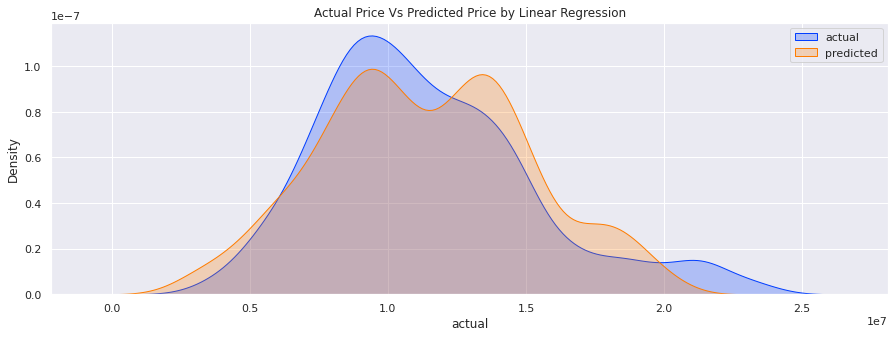

In [ ]:
plot.figure(figsize=(15,5))
sns.set_palette('bright')
sns.kdeplot(data=lr_prediction, x='actual', label='actual', shade=True)
sns.kdeplot(data=lr_prediction, x='predicted', label='predicted', shade=True)
plot.title("Actual Price Vs Predicted Price by Linear Regression")
plot.legend()
plot.show()



*   Linear Regression model showing high prices than actual and sometimes low prices than the actual price.
*   This model has 92% r2 score.



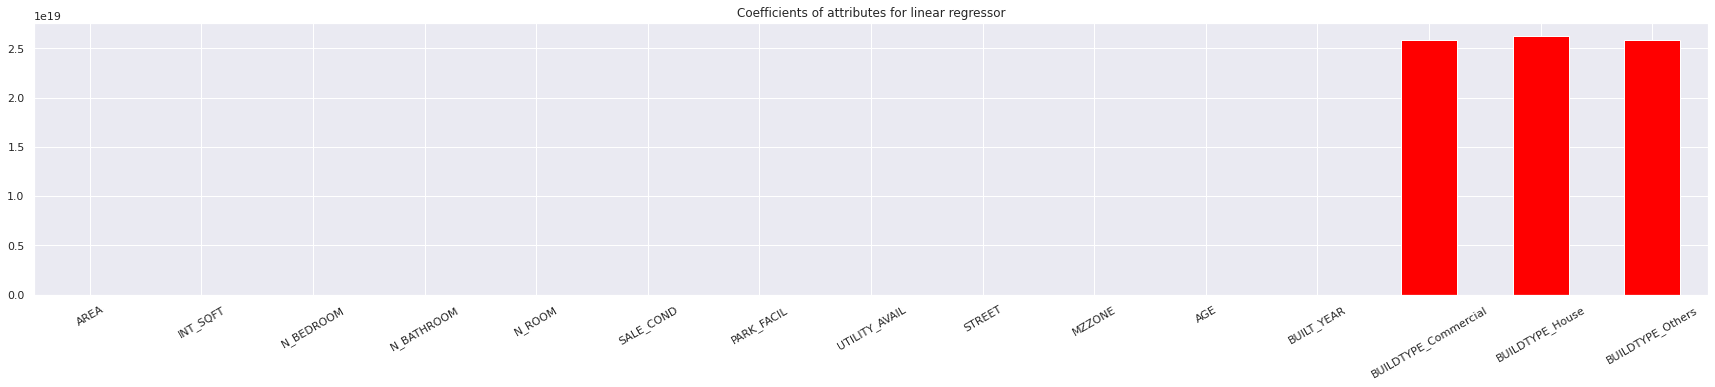

In [ ]:
lr_coefficient = pd.Series(lr.coef_, index=X.columns.tolist())

plot.figure(figsize=(30, 5))
lr_coefficient.plot(kind='bar',color = 'red')
plot.title("Coefficients of attributes for linear regressor")
plot.xticks(rotation=30)
plot.show()



*   By this model, the most important features are number of rooms, buildtype and Area.

# ***KNN Regression***

In [ ]:
len(y_test)

2844

In [ ]:
knn_regressor = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)
knn_ypred = knn_regressor.predict(X_test)
knn_score = metrics.r2_score(y_test, knn_ypred)
knn_mae = metrics.mean_absolute_error(y_test, knn_ypred)
knn_mse = metrics.mean_squared_error(y_test,y_pred)
print("KNN regressor train score: {:.2f}".format(knn_regressor.score(X_train, y_train)))
print("KNN regressor test score: {:.2f}".format(knn_regressor.score(X_test, y_test)))
print("KNN r2 score: {:.2f}".format(knn_score))
print("MSE: {:.2f}".format(metrics.mean_squared_error(y_test, y_pred)))
print("MAE: {:.2f}".format(metrics.mean_absolute_error(y_test, y_pred)))

KNN regressor train score: 0.97
KNN regressor test score: 0.94
KNN r2 score: 0.94
MSE: 1178279616743.44
MAE: 820968.87


In [ ]:
knn_prediction = pd.DataFrame({'actual':y_test, 'predicted': knn_ypred.flatten()})

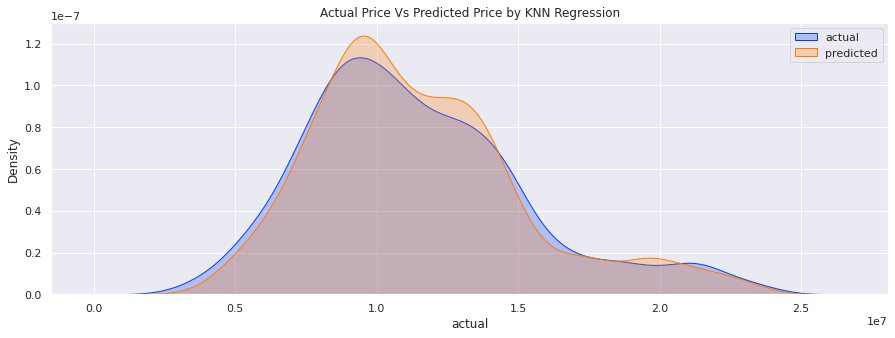

In [ ]:
plot.figure(figsize=(15,5))
sns.set_palette('bright')
sns.kdeplot(data=knn_prediction, x='actual', label='actual', shade=True)
sns.kdeplot(data=knn_prediction, x='predicted', label='predicted',shade=True)
plot.title("Actual Price Vs Predicted Price by KNN Regression")
plot.legend()
plot.show()



*   Some predictions are higher than actual price.



# ***Decision Tree Regression***

In [ ]:
dt_regressor = DecisionTreeRegressor(max_depth=8).fit(X_train, y_train)
dt_y_predict = dt_regressor.predict(X_test)

In [ ]:
dt_score = metrics.r2_score(y_test, dt_y_predict)
dt_mae = metrics.mean_absolute_error(y_test, dt_y_predict)
print("DT Training score: {:.2f}".format(dt_regressor.score(X_train, y_train)))
print("DT Test score: {:.2f}".format(dt_regressor.score(X_test, y_test)))
print("DT R2 score: {:.2f}".format(metrics.r2_score(y_test, dt_y_predict)))
print("DT MSE: {:.2f}".format(metrics.mean_squared_error(y_test, dt_y_predict)))
print("DT MAE: {:.2f}".format(metrics.mean_absolute_error(y_test, dt_y_predict)))

DT Training score: 0.97
DT Test score: 0.96
DT R2 score: 0.96
DT MSE: 666433626815.66
DT MAE: 654433.74


In [ ]:
dt_prediction = pd.DataFrame({'actual':y_test, 'predicted': dt_y_predict.flatten()})

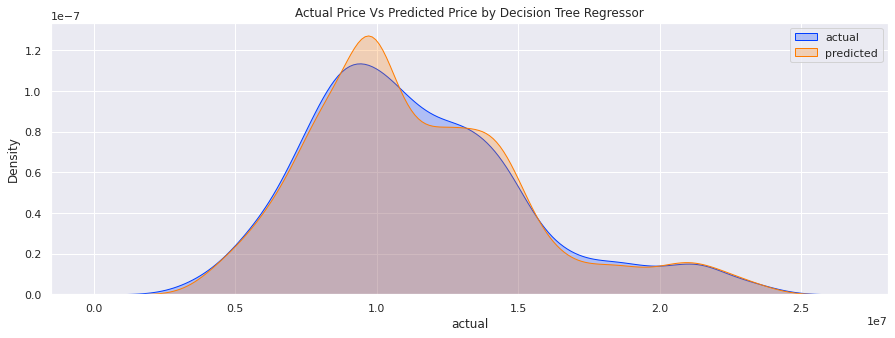

In [ ]:
plot.figure(figsize=(15,5))
sns.kdeplot(data=dt_prediction, x='actual', label='actual', shade=True)
sns.kdeplot(data=dt_prediction, x='predicted', label='predicted',shade=True)
plot.title("Actual Price Vs Predicted Price by Decision Tree Regressor")
plot.legend()
plot.show()



*   Decision Tree Regression model better than KNN and Linear regression model.
*   This model is more accurate with high r2 score.


In [ ]:
dt_coefficient = pd.Series(dt_regressor.feature_importances_, index=X.columns.tolist())

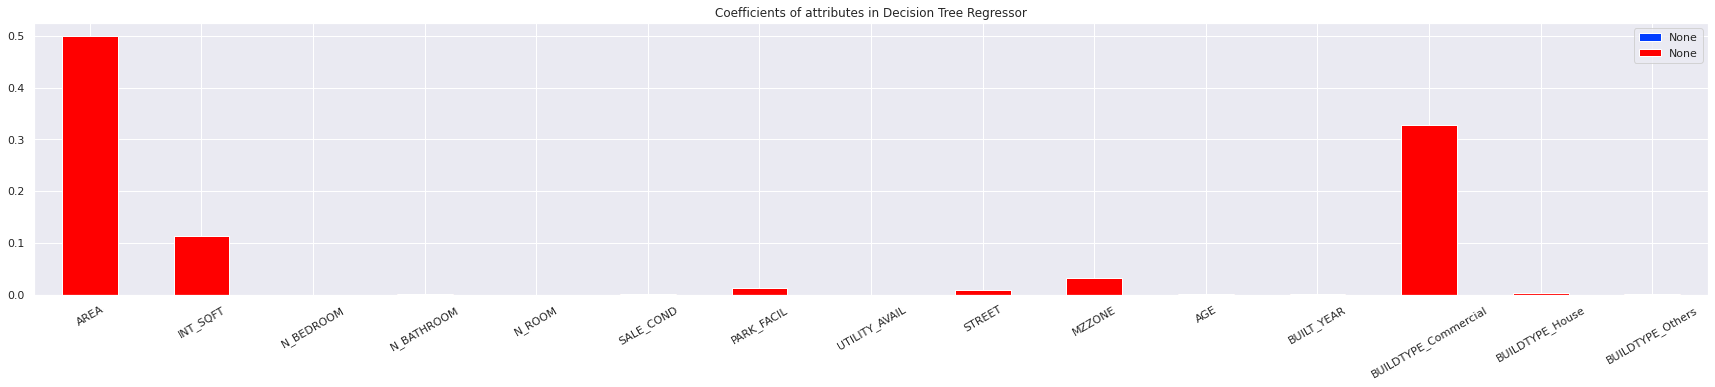

In [ ]:
plot.figure(figsize=(30, 5))
dt_coefficient.plot(kind='bar')
dt_coefficient.plot(kind='bar',color = 'red')
plot.title("Coefficients of attributes in Decision Tree Regressor")
plot.legend()
plot.xticks(rotation=30)
plot.show()



*   The Area is the most important feature.



# ***Random Forest Regression***

In [ ]:
rf_regressor = RandomForestRegressor(random_state=0).fit(X_train, y_train)
rf_y_predict = rf_regressor.predict(X_test)

In [ ]:
rf_score = metrics.r2_score(y_test, rf_y_predict)
rf_mae = metrics.mean_absolute_error(y_test, rf_y_predict)

In [ ]:
print("RF Training score: {:.2f}".format(rf_regressor.score(X_train, y_train)))
print("RF Test score: {:.2f}".format(rf_regressor.score(X_test, y_test)))
print("RF R2 score: {:.2f}".format(metrics.r2_score(y_test, rf_y_predict)))
print("RF MSE: {:.2f}".format(metrics.mean_squared_error(y_test, rf_y_predict)))
print("RF MAE: {:.2f}".format(metrics.mean_absolute_error(y_test, rf_y_predict)))

RF Training score: 1.00
RF Test score: 0.99
RF R2 score: 0.99
RF MSE: 204910146336.29
RF MAE: 357164.35




*   Random forest regression has the most r2 score than decision tree regression.



In [ ]:
rf_prediction = pd.DataFrame({ 'actual':y_test, 'predicted': rf_y_predict.flatten()})

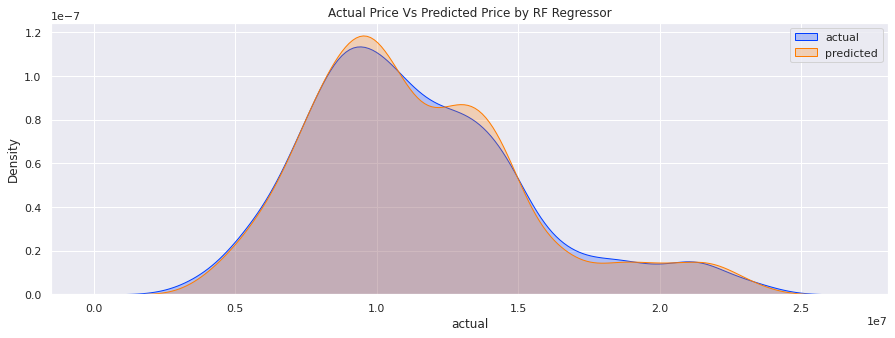

In [ ]:
plot.figure(figsize=(15,5))
sns.kdeplot(data=rf_prediction, x='actual', label='actual', shade=True)
sns.kdeplot(data=rf_prediction, x='predicted', label='predicted',shade=True)
plot.title("Actual Price Vs Predicted Price by RF Regressor")
plot.legend()

plot.show()

In [ ]:
rf_coefficient = pd.Series(rf_regressor.feature_importances_, index=X.columns.tolist())

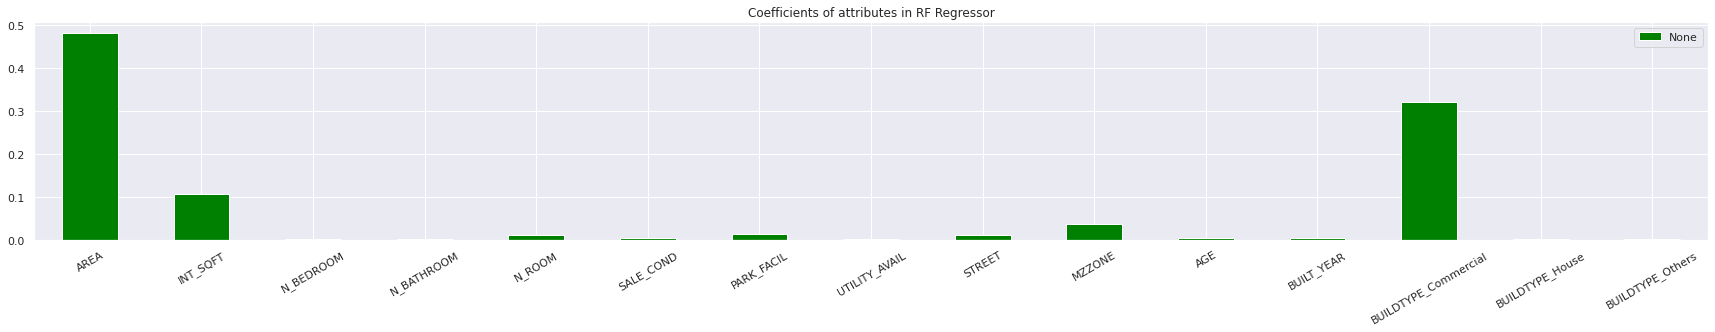

In [ ]:
plot.figure(figsize=(30, 4))
rf_coefficient.plot(kind='bar',color="green")
plot.title("Coefficients of attributes in RF Regressor")
plot.xticks(rotation=30)
plot.legend()
plot.show()



*   The coefficients are same as Decision tree coefficients.



# **XG boost**

In [ ]:
from xgboost import XGBRegressor
xg = XGBRegressor().fit(X_train,y_train)

xg_y_predict = xg.predict(X_test)
xg.score(X_train,y_train)

[15:48:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9922160743488476

In [ ]:
xg_score = metrics.r2_score(y_test, xg_y_predict)
xg_mae = metrics.mean_absolute_error(y_test, xg_y_predict)
xg_mse = metrics.mean_squared_error(y_test, rf_y_predict)

In [ ]:
print("xg Training score: {:.2f}".format(xg.score(X_train, y_train)))
print("xg Test score: {:.2f}".format(xg.score(X_test, y_test)))
print("xg R2 score: {:.2f}".format(metrics.r2_score(y_test, xg_y_predict)))
print("xg MSE: {:.2f}".format(metrics.mean_squared_error(y_test, xg_y_predict)))
print("xg MAE: {:.2f}".format(metrics.mean_absolute_error(y_test, xg_y_predict)))

xg Training score: 0.99
xg Test score: 0.99
xg R2 score: 0.99
xg MSE: 141699090522.91
xg MAE: 294420.69


In [ ]:
xg_prediction = pd.DataFrame({ 'actual':y_test, 'predicted': xg_y_predict.flatten()})

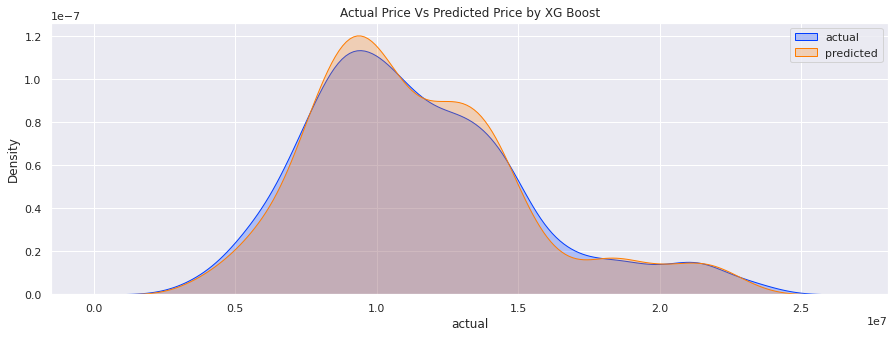

In [ ]:
plot.figure(figsize=(15,5))
sns.kdeplot(data=xg_prediction, x='actual', label='actual', shade=True)
sns.kdeplot(data=xg_prediction, x='predicted', label='predicted',shade=True)
plot.title("Actual Price Vs Predicted Price by XG Boost")
plot.legend()

plot.show()

In [ ]:
xg_coefficient = pd.Series(xg.feature_importances_, index=X.columns.tolist())

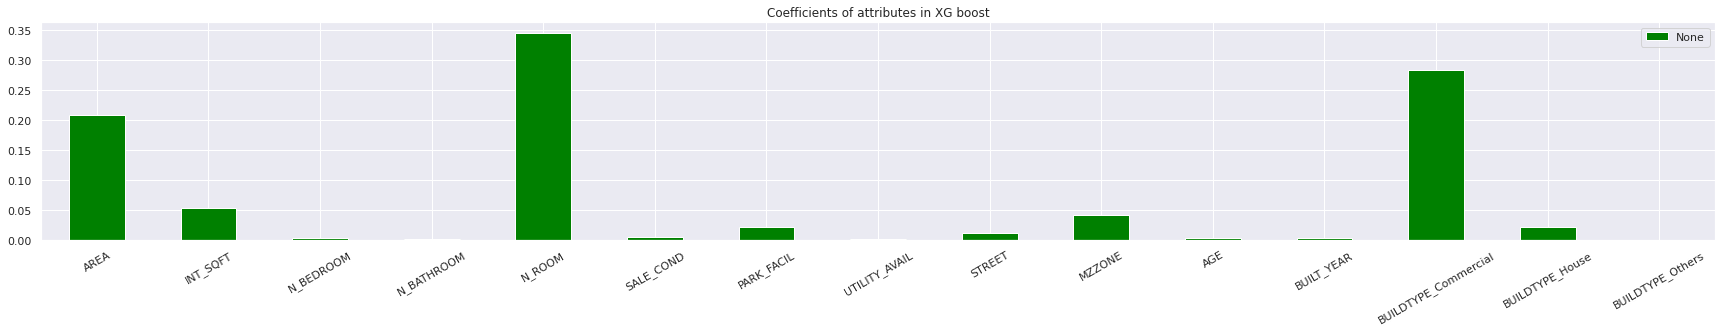

In [ ]:
plot.figure(figsize=(30, 4))
xg_coefficient.plot(kind='bar',color="green")
plot.title("Coefficients of attributes in XG boost")
plot.xticks(rotation=30)
plot.legend()
plot.show()

# ***Comparision***

In [ ]:
models_df = pd.DataFrame({
    'model': "Linear KNN Decision_Tree Random_Forest XG_boost".split(),
    'r2_score': [lr_score,knn_score, dt_score, rf_score,xg_score],
    'mae': [lr_mae, knn_mae, dt_mae, rf_mae,xg_mae]
})

models_df

,model,r2_score,mae
0,Linear,0.924885,820968.870120
1,KNN,0.944204,718210.970581
2,Decision_Tree,0.957515,654433.741037
3,Random_Forest,0.986937,357164.352071
4,XG_boost,0.990967,294420.692159


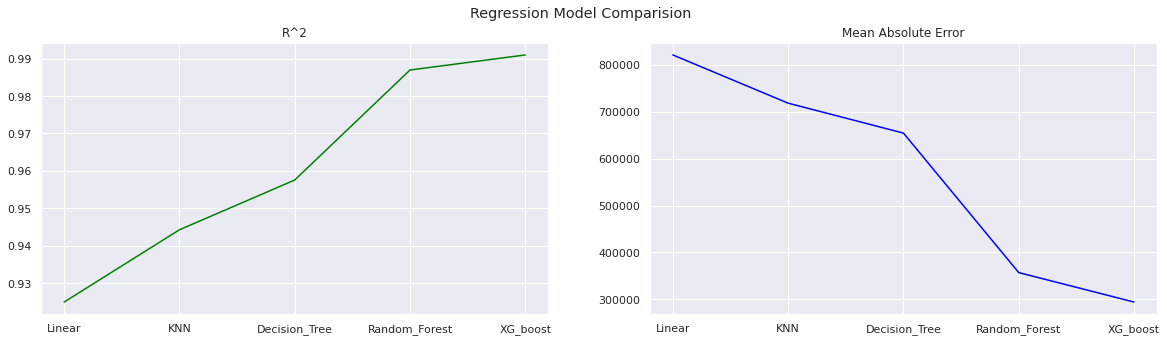

In [ ]:
fig, ax = plot.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle("Regression Model Comparision")
ax[0].plot(models_df.model, models_df.r2_score, color='green')
ax[0].set_title("R^2")
ax[1].plot(models_df.model, models_df.mae, color='blue')
ax[1].set_title("Mean Absolute Error")
plot.show()



*   ***XG boost has best R2 score along with mean absolute error followed by Random forest model.***



In [ ]:
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,BUILT_YEAR,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,0,6.911747,1,1,3,2,1,3,1,0,8124400,44,1967,1,0,0
1,5,7.593878,2,1,5,2,0,3,2,3,22781941,11,1995,1,0,0
2,1,6.812345,1,1,3,2,1,0,2,4,13672408,20,1992,1,0,0
3,3,7.525640,3,2,5,1,0,2,1,2,10063653,22,1988,0,0,1
4,0,7.111512,1,1,3,2,1,3,2,1,7717313,30,1979,0,0,1


In [ ]:
y = df.SALES_PRICE
X = df.drop(['N_BATHROOM','AGE', 'PARK_FACIL', 'STREET',  'SALE_COND','N_BEDROOM','UTILITY_AVAIL','BUILT_YEAR','SALES_PRICE'], axis=1)
X.shape, y.shape

((7109, 7), (7109,))

In [ ]:
X.head()

,AREA,INT_SQFT,N_ROOM,MZZONE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,0,6.911747,3,0,1,0,0
1,5,7.593878,5,3,1,0,0
2,1,6.812345,3,4,1,0,0
3,3,7.525640,5,2,0,0,1
4,0,7.111512,3,1,0,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=100, test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5687, 7), (5687,), (1422, 7), (1422,))

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
Regressor = XGBRegressor().fit(X_train, y_train) 
y_pred_xgbr = Regressor.predict(X_test)
metrics.r2_score(y_test, y_pred_xgbr)

[15:48:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9589353019555635

In [ ]:
def predict():
        AREA = int(input("area: "))
        INT_SQFT = int(input("sqft: "))
        N_ROOM = int(input("number of rooms: "))
        MZZONE = float(input("mzzone: "))
        BUILDTYPE_Commercial	= int(input("BUILDTYPE_Commercial	"))
        BUILDTYPE_House	= int(input("BUILDTYPE_House	"))
        BUILDTYPE_Others	= int(input("BUILDTYPE_Others	"))
        data = []
        data = np.array([[AREA, INT_SQFT,N_ROOM, BUILDTYPE_Commercial, BUILDTYPE_House, BUILDTYPE_Others, MZZONE]])
        my_prediction = Regressor.predict(data)

        prediction_text='House Price is {} Rs'.format(my_prediction)
        return prediction_text

In [ ]:
## df['AREA'] = df.AREA.map({'Karapakkam': 0, 'Adyar': 1, 'Chrompet': 2, 'Velachery': 3, 'KK Nagar': 4, 'Anna Nagar': 5, 'T Nagar': 6})
## df['SALE_COND'] = df.SALE_COND.map({'Partial': 0, 'Family': 1,'AbNormal': 2, 'Normal Sale': 3, 'AdjLand': 4})
## df['PARK_FACIL'] = df.PARK_FACIL.map({"No":0,'Yes':1,})
## df['UTILITY_AVAIL'] = df.UTILITY_AVAIL.map({'ELO': 0, 'NoSeWa': 1, 'NoSewr ': 2,'AllPub': 3})
## df['STREET'] = df.STREET.map({'No Access': 0,'Paved': 1, 'Gravel': 2})
## df['MZZONE'] = df.MZZONE.map({'A': 0, 'C': 1, 'I': 2, 'RH': 3, 'RL': 4, 'RM': 5})
## df["BUILDTYPE"] = df.BUILDTYPE.map({"House":0,"Commercial":1,"Others":2})

In [ ]:
#predict()

# ***Summary***



*  *All the houses are from seven areas which ar Karapakkam, Anna Nagar,Adyar,Chrompet, KK Nagar, T Nagar and Velachery.*
*   *Given the house are all built in between 1949 to 2010.*
*  *All the houses are sold in between 2004 to 2014.*
*   *Highest number of houses were sold in 2010-11. Houses are ranges in between rupees 20 Lakh to more than 2 Crore.*
*   *More number of houses were sold in Chrompet and Karapakkam. Most of these houses have single bedroom and of lower price than houses in T Nagar and Anna Nagar.*
* *In Karapakkam the streets have limited or no access, which causes the house price to drop.*
* *Houses near to Gravel type of street come with highest price, followed by paved roads.*
*  *Streets with no access gets less value.*
*  *The building type and available utilities effects the house price.*
*  *The most important feature for the random forest regression is in which area the house is located.*
*  *Random Forest is a better model with a coefficient of determination of 98% and mean absolute error as minimum as. Better than rest of the regression models.* 

